# Основная часть
## Задание
Схема типового исследования, проводимого студентом в рамках курсовой работы, содержит выполнение следующих шагов:

1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.
2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.
3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.
4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
5. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее трех метрик и обосновать выбор.
6. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее пяти моделей, две из которых должны быть ансамблевыми.
7. Формирование обучающей и тестовой выборок на основе исходного набора данных.
8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
9. Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.
11. Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д.

Приведенная схема исследования является рекомендуемой. В зависимости от решаемой задачи возможны модификации.

## Последовательность действий

### 1) Поиск и выбор набора данных для построения моделей машинного обучения. 

В работе используется набор данных, состоящий из 11 колонок и 32686 наблюдений. 6 столбцов – это числовые атрибуты с различными природными параметрами. 5 столбцов – Дата UNIX time_t (секунды с 1 января 1970 года), формат даты в формате гггг-ММ-ДД, местное время суток в формате hh:mm:ss и Восход/Закат Солнца: Гавайское время
Набор данных содержит следующие колонки:
1. Дата UNIX time_t (секунды с 1 января 1970 года)(UNIXTime)
2. Формат даты в формате гггг-ММ-ДД (Data)
3. местное время суток в формате hh:mm:ss (Time)
4. Солнечное излучение: ватт на метр^2 (Radiation)
5. Температура: градусы по Фаренгейту (Temperature)
6. Барометрическое давление: Hg(Pressure)
7. Влажность воздуха: в процентах (Humidity)
8. Направление ветра: Градусы (WindDirection(Degrees))
9. Скорость ветра: мили в час (Speed)
10. Время восхода (TimeSunRise)
11. Время заката (TimeSunSet)


In [319]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pytz

from datetime import datetime
from sklearn import utils
from pytz import timezone
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder

%matplotlib inline 
sns.set(style="ticks")

In [320]:
data = pd.read_csv('SolarPrediction.csv', sep=",")
data = data[:10000]

### 2) Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. 

In [321]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [322]:
data.shape

(10000, 11)

In [323]:
data.columns

Index(['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise',
       'TimeSunSet'],
      dtype='object')

In [324]:
data.dtypes

UNIXTime                    int64
Data                       object
Time                       object
Radiation                 float64
Temperature                 int64
Pressure                  float64
Humidity                    int64
WindDirection(Degrees)    float64
Speed                     float64
TimeSunRise                object
TimeSunSet                 object
dtype: object

In [325]:
data.isnull().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

Получим из имеющихся категориальных признаков новые, которые позже будет возможность использовать

In [326]:
hawaii= timezone('Pacific/Honolulu')
data.index =  pd.to_datetime(data['UNIXTime'], unit='s')
data.index = data.index.tz_localize(pytz.utc).tz_convert(hawaii)
data['DayOfYear'] = data.index.strftime('%j').astype(int)
data['TimeSunRise'] = pd.to_datetime(data['TimeSunRise'], format='%H:%M:%S')
data['TimeSunSet'] = pd.to_datetime(data['TimeSunSet'], format='%H:%M:%S')
data['DayLength(s)'] = data['TimeSunSet'].dt.hour*60*60 \
                           + data['TimeSunSet'].dt.minute*60 \
                           + data['TimeSunSet'].dt.second \
                           - data['TimeSunRise'].dt.hour*60*60 \
                           - data['TimeSunRise'].dt.minute*60 \
                           - data['TimeSunRise'].dt.second

In [327]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,DayOfYear,DayLength(s)
UNIXTime,,,,,,,,,,,,,
2016-09-29 23:55:26-10:00,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,1900-01-01 06:13:00,1900-01-01 18:13:00,273,43200
2016-09-29 23:50:23-10:00,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,1900-01-01 06:13:00,1900-01-01 18:13:00,273,43200
2016-09-29 23:45:26-10:00,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,1900-01-01 06:13:00,1900-01-01 18:13:00,273,43200
2016-09-29 23:40:21-10:00,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,1900-01-01 06:13:00,1900-01-01 18:13:00,273,43200
2016-09-29 23:35:24-10:00,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,1900-01-01 06:13:00,1900-01-01 18:13:00,273,43200


Исключим ненужные категориальные признаки

In [328]:
data = data.drop(columns=['UNIXTime', 'Data', 'Time', 'TimeSunRise', 'TimeSunSet'])
data = data.reset_index()
data = data.drop(columns=['UNIXTime'])

In [329]:
data.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,DayOfYear,DayLength(s)
0,1.21,48,30.46,59,177.39,5.62,273,43200
1,1.21,48,30.46,58,176.78,3.37,273,43200
2,1.23,48,30.46,57,158.75,3.37,273,43200
3,1.21,48,30.46,60,137.71,3.37,273,43200
4,1.17,48,30.46,62,104.95,5.62,273,43200


Набор данных не содержит пропусков, категориальные пизнаки проанализированны и исключены.

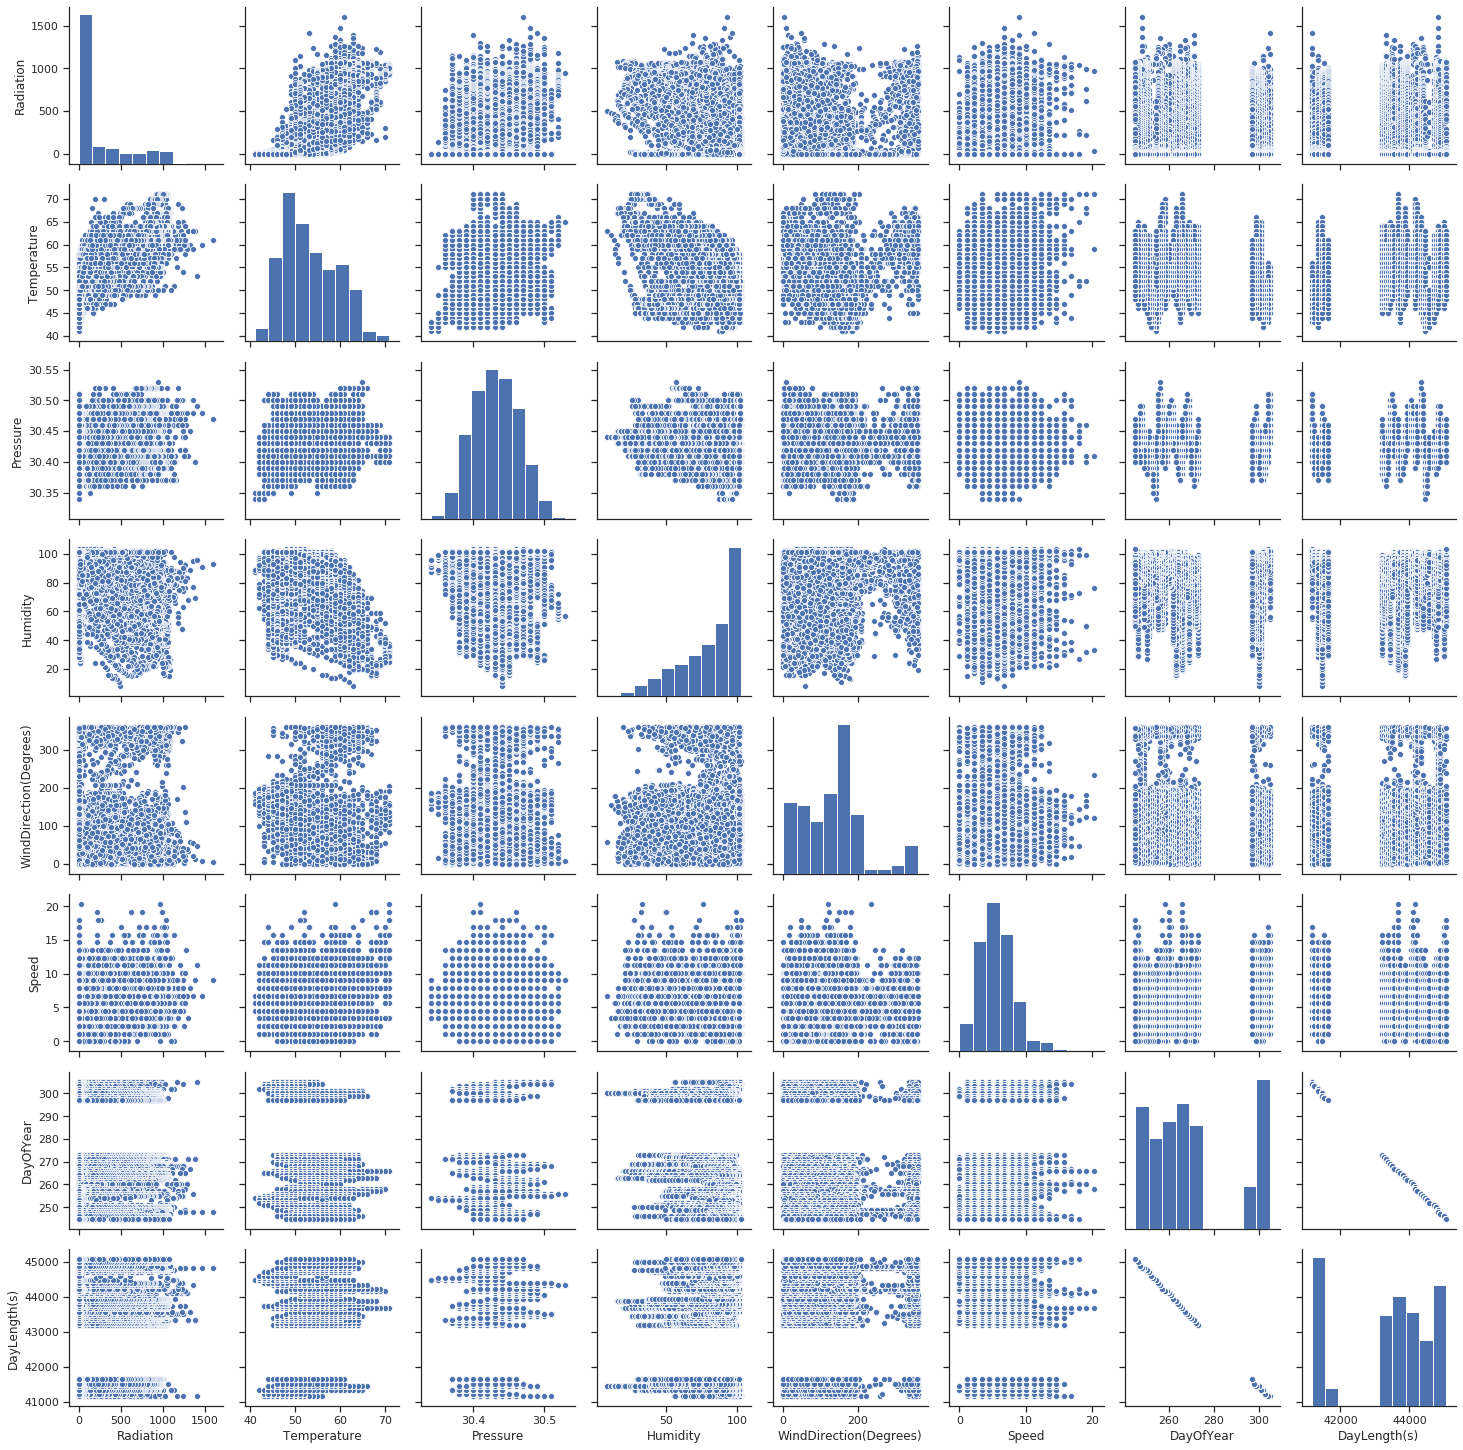

In [330]:
sns.pairplot(data)

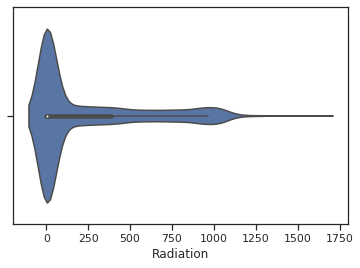

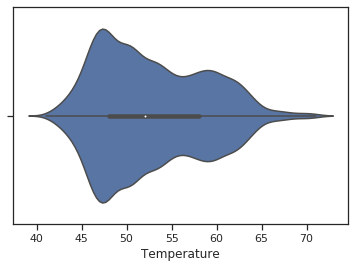

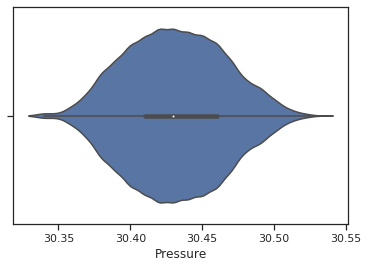

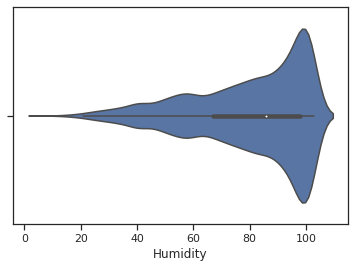

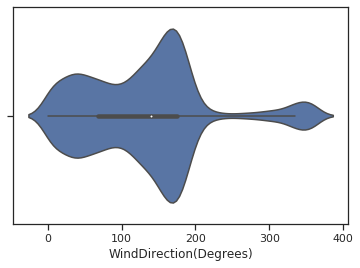

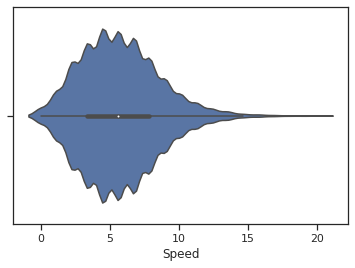

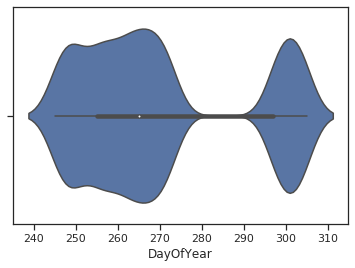

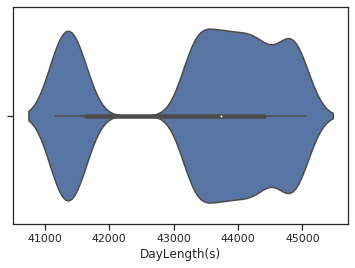

In [331]:
# Скрипичные диаграммы для числовых колонок
for col in data.columns:
    sns.violinplot(x=data[col])
    plt.show()

### 3) Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

Для построения моделей будем использовать все признаки. Категориальные признаки закодированы.Выполним масштабирование данных. 

In [332]:
# Числовые колонки для масштабирования
scale_cols = data.columns

In [333]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[scale_cols])

In [334]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data[new_col_name] = sc1_data[:,i]

In [335]:
data.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,DayOfYear,DayLength(s),Radiation_scaled,Temperature_scaled,Pressure_scaled,Humidity_scaled,WindDirection(Degrees)_scaled,Speed_scaled,DayOfYear_scaled,DayLength(s)_scaled
0,1.21,48,30.46,59,177.39,5.62,273,43200,0.000050,0.233333,0.631579,0.536842,0.492719,0.277531,0.466667,0.523077
1,1.21,48,30.46,58,176.78,3.37,273,43200,0.000050,0.233333,0.631579,0.526316,0.491024,0.166420,0.466667,0.523077
2,1.23,48,30.46,57,158.75,3.37,273,43200,0.000062,0.233333,0.631579,0.515789,0.440918,0.166420,0.466667,0.523077
3,1.21,48,30.46,60,137.71,3.37,273,43200,0.000050,0.233333,0.631579,0.547368,0.382448,0.166420,0.466667,0.523077
4,1.17,48,30.46,62,104.95,5.62,273,43200,0.000025,0.233333,0.631579,0.568421,0.291407,0.277531,0.466667,0.523077


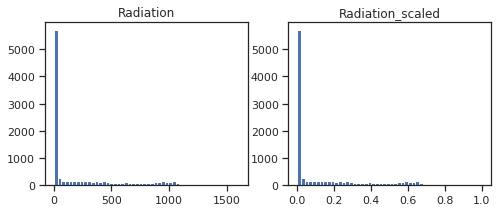

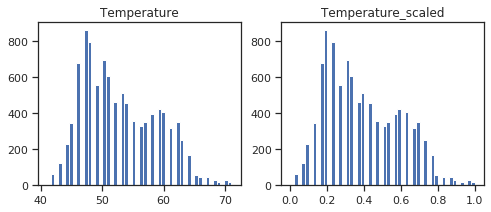

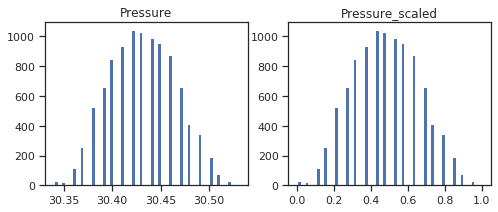

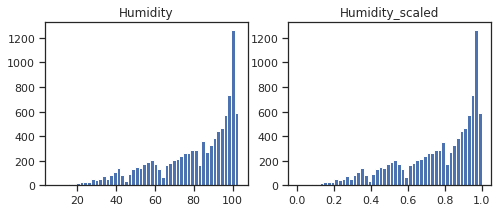

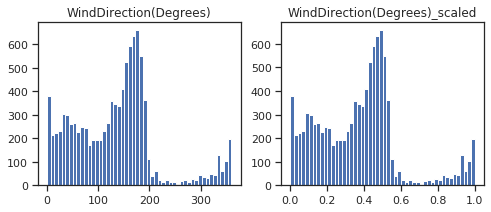

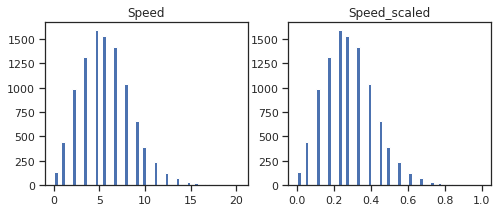

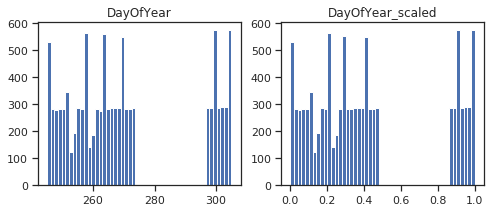

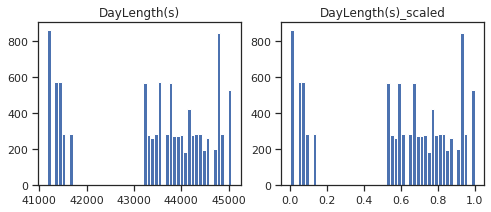

In [336]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

### 4) Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения

In [337]:
corr_cols_1 = scale_cols
corr_cols_1

Index(['Radiation', 'Temperature', 'Pressure', 'Humidity',
       'WindDirection(Degrees)', 'Speed', 'DayOfYear', 'DayLength(s)'],
      dtype='object')

In [338]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix
corr_cols_2

['Radiation_scaled',
 'Temperature_scaled',
 'Pressure_scaled',
 'Humidity_scaled',
 'WindDirection(Degrees)_scaled',
 'Speed_scaled',
 'DayOfYear_scaled',
 'DayLength(s)_scaled']

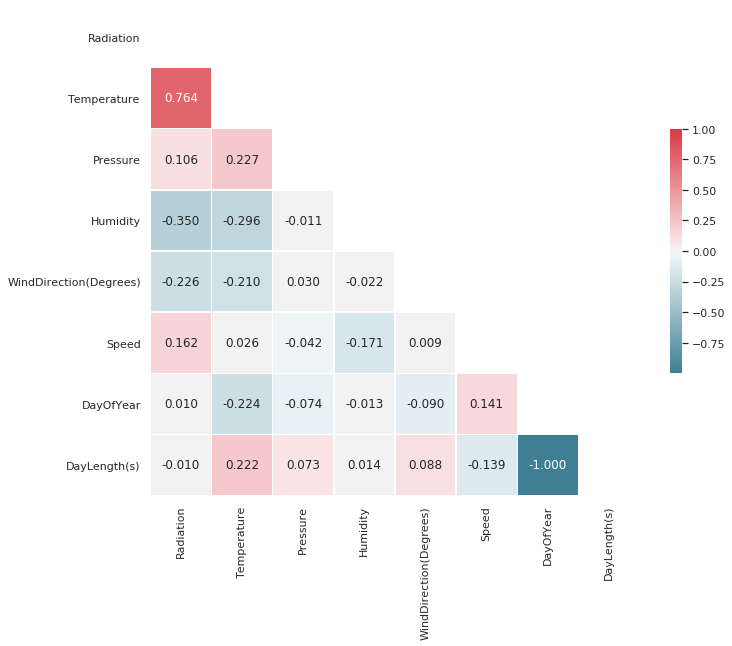

In [339]:
sns.set(style="white")
corr = data[corr_cols_1].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
g=sns.heatmap(corr, mask=mask, cmap=cmap, center=0, annot=True, fmt='.3f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

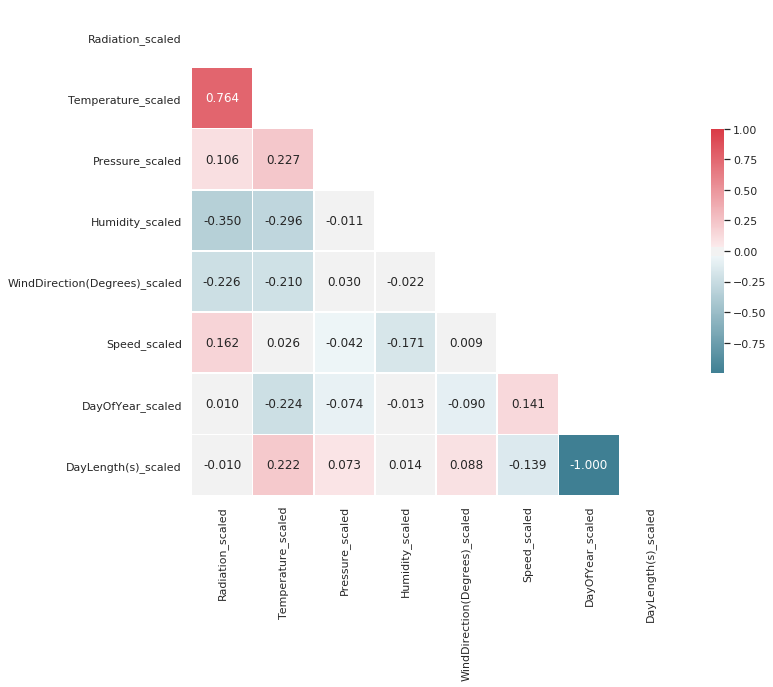

In [340]:
sns.set(style="white")
corr = data[corr_cols_2].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
g=sns.heatmap(corr, mask=mask, cmap=cmap, center=0, annot=True, fmt='.3f',
              square=True, linewidths=.5, cbar_kws={"shrink": .5})

На основе корреляционной матрицы можно сделать следующие выводы:

- Корреляционные матрицы для исходных и масштабированных данных совпадают.
- Признаки "DayOfYear" и "DayLenght" имеют большую корреляцию,  поэтому оба признака не следует включать в модель. Будем использовать признак "DayOfYear".
- Целевой признак Регрессии "Radiation" наиболее сильно коррелирует со следующими признаками:
    1. "WindDirection" (-0.226);
    2. "Humidity" (-0.350)
    3. "Pressure" (0.106)
    4. "Temperarure" (0.764)
    5. "Speed" (0.162)
    Эти признаки следует оставить в модели регрессии.
- На основании корреляционной матрицы можно сделать вывод о том, что данные позволяют построить модель машинного обучения.

### 5) Выбор метрик для последующей оценки качества моделей

### В качестве метрик для решения задачи регрессии будем использовать:

#### 1. Mean absolute error - средняя абсолютная ошибка

Чем ближе значение к нулю, тем лучше качество регрессии.
Основная проблема метрики состоит в том, что она не нормирована.
Вычисляется с помощью функции [mean_absolute_error.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error)

#### 2. Mean squared error - средняя квадратичная ошибка

Вычисляется с помощью функции [mean_squared_error.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)

#### 3. Метрика $R^2$ или коэффициент детерминации
Вычисляется с помощью функции [r2_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score)

In [284]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()  

### 6) Выбор наиболее подходящих моделей для решения задачи регрессии

Для задачи регрессиибудем использовать следующие модели:

- Линейная регрессия
- Метод ближайших соседей
- Машина опорных векторов
- Решающее дерево
- Случайный лес
- Градиентный бустинг

### 7) Формирование обучающей и тестовой выборок на основе исходного набора данных

In [412]:
# Признаки для задачи регрессии
task_regr_cols = ['WindDirection(Degrees)_scaled',
                  'Humidity_scaled',
                  'Pressure_scaled',
                  'Temperature_scaled',
                  'Speed_scaled'
                 ]

In [342]:
X = data[task_regr_cols]
Y = data['Radiation']
X.shape

(10000, 5)

In [343]:
# С использованием метода train_test_split разделим выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)
print(utils.multiclass.type_of_target(Y_train.astype('int')))

multiclass


In [344]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((7500, 5), (2500, 5), (7500,), (2500,))

### 8) Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки

In [345]:
# Модели
regr_models = {'LR': LinearRegression(), 
               'KNN_5':KNeighborsRegressor(n_neighbors=5),
               'SVR':SVR(),
               'Tree':DecisionTreeRegressor(),
               'RF':RandomForestRegressor(),
               'GB':GradientBoostingRegressor()}

In [346]:
# Сохранение метрик
regrMetricLogger = MetricLogger()

In [347]:
def regr_train_model(model_name, model, regrMetricLogger):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    regrMetricLogger.add('MAE', model_name, mae)
    regrMetricLogger.add('MSE', model_name, mse)
    regrMetricLogger.add('R2', model_name, r2)    
    
    print('*****************************************************')
    print(model)
    print()
    print('MAE={}, MSE={}, R2={}'.format(
        round(mae, 3), round(mse, 3), round(r2, 3)))
    print('*****************************************************')

In [348]:
for model_name, model in regr_models.items():
    regr_train_model(model_name, model, regrMetricLogger)

*****************************************************
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

MAE=159.16, MSE=43305.527, R2=0.618
*****************************************************
*****************************************************
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

MAE=87.759, MSE=26024.48, R2=0.77
*****************************************************
*****************************************************
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

MAE=142.57, MSE=54867.928, R2=0.516
*****************************************************
*****************************************************
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_feat

### 9) Подбор гиперпараметров для выбранных моделей. 

##### Метод ближайших соседей

In [349]:
n_range = np.array(range(1,200,4))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([  1,   5,   9,  13,  17,  21,  25,  29,  33,  37,  41,  45,  49,
          53,  57,  61,  65,  69,  73,  77,  81,  85,  89,  93,  97, 101,
         105, 109, 113, 117, 121, 125, 129, 133, 137, 141, 145, 149, 153,
         157, 161, 165, 169, 173, 177, 181, 185, 189, 193, 197])}]

In [350]:
%%time
regr_gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=5, scoring='explained_variance')
regr_gs.fit(X_train, Y_train)

CPU times: user 15.2 s, sys: 16 ms, total: 15.2 s
Wall time: 15.2 s


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': array([  1,   5,   9,  13,  17,  21,  25,  29,  33,  37,  41,  45,  49,
        53,  57,  61,  65,  69,  73,  77,  81,  85,  89,  93,  97, 101,
       105, 109, 113, 117, 121, 125, 129, 133, 137, 141, 145, 149, 153,
       157, 161, 165, 169, 173, 177, 181, 185, 189, 193, 197])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='explained_variance', verbose=0)

In [351]:
# Лучшая модель
regr_gs.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                    weights='uniform')

In [352]:
# Лучшее значение параметров
regr_gs.best_params_

{'n_neighbors': 9}

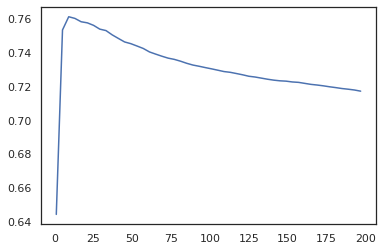

In [353]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, regr_gs.cv_results_['mean_test_score'])

##### Линейная Регрессия

In [354]:
%%time

grid = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
gs_LinR = GridSearchCV(LinearRegression(), grid, cv=5, scoring='explained_variance')
gs_LinR.fit(X_train, Y_train)

CPU times: user 487 ms, sys: 0 ns, total: 487 ms
Wall time: 133 ms


GridSearchCV(cv=5, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='explained_variance', verbose=0)

In [355]:
# Лучшая модель
gs_LinR.best_estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [356]:
# Лучшее значение параметров
gs_LinR.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

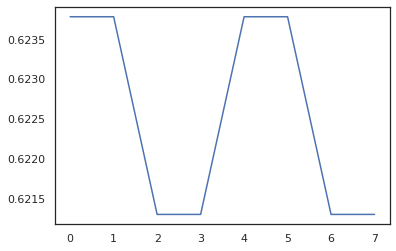

In [357]:
# Изменение качества на тестовой выборке
plt.plot(gs_LinR.cv_results_['mean_test_score'])

##### Машина опорных векторов

In [375]:
%%time
SVR_grid={"C":np.logspace(-3,4,12), "kernel":['rbf']}
gs_SVR = GridSearchCV(SVR(), SVR_grid, cv=5, scoring='explained_variance')
gs_SVR.fit(X_train, Y_train)

CPU times: user 6min 52s, sys: 3.52 s, total: 6min 55s
Wall time: 6min 55s


GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-03, 4.32876128e-03, 1.87381742e-02, 8.11130831e-02,
       3.51119173e-01, 1.51991108e+00, 6.57933225e+00, 2.84803587e+01,
       1.23284674e+02, 5.33669923e+02, 2.31012970e+03, 1.00000000e+04]),
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='explained_variance', verbose=0)

In [376]:
# Лучшая модель
gs_SVR.best_estimator_

SVR(C=10000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [377]:
# Лучшее значение параметров
gs_SVR.best_params_

{'C': 10000.0, 'kernel': 'rbf'}

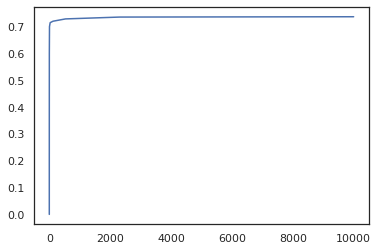

In [378]:
# Изменение качества на тестовой выборке
plt.plot(np.logspace(-3,4,12), gs_SVR.cv_results_['mean_test_score'])

##### Решающее дерево

In [379]:
%%time
tree_params={"max_depth":range(1,40), "max_features":range(1,5)}
gs_Tree = GridSearchCV(DecisionTreeRegressor(), tree_params, cv=5, scoring='explained_variance')
gs_Tree.fit(X_train, Y_train)

CPU times: user 9.97 s, sys: 4.01 ms, total: 9.97 s
Wall time: 9.98 s


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 40),
                         'max_features': range(1, 5)},
             pre_dispatch='2*n_jobs', refit=True

In [380]:
# Лучшая модель
gs_Tree.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [381]:
# Лучшее значение параметров
gs_Tree.best_params_

{'max_depth': 7, 'max_features': 3}

##### Случайный лес

In [402]:
%%time
RF_params={"max_leaf_nodes":range(2,12), "max_samples":range(2,30)}
gs_RF = GridSearchCV(RandomForestRegressor(), RF_params, cv=5, scoring='explained_variance')
gs_RF.fit(X_train, Y_train)

CPU times: user 2min 27s, sys: 660 ms, total: 2min 28s
Wall time: 2min 28s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [403]:
# Лучшая модель
gs_RF.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=7,
                      max_samples=29, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [404]:
# Лучшее значение параметров
gs_RF.best_params_

{'max_leaf_nodes': 7, 'max_samples': 29}

##### Градиентный бустинг

In [405]:
%%time
GB_params={"max_features":range(1,5), "max_leaf_nodes":range(2,22)}
gs_GB = GridSearchCV(GradientBoostingRegressor(), GB_params, cv=5, scoring='explained_variance')
gs_GB.fit(X_train, Y_train)

CPU times: user 1min 25s, sys: 1e+03 ns, total: 1min 25s
Wall time: 1min 25s


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [406]:
# Лучшая модель
gs_GB.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=4, max_leaf_nodes=10,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [407]:
# Лучшее значение параметров
gs_GB.best_params_

{'max_features': 4, 'max_leaf_nodes': 10}

### 10) Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей

In [408]:
models_grid = {'LR_new':gs_LinR.best_estimator_,
               'KNN_new':regr_gs.best_estimator_,
                'SVR_new':gs_SVR.best_estimator_,
              'Tree_new':gs_Tree.best_estimator_,
               'RF_new':gs_RF.best_estimator_,
              'GB_new':gs_GB.best_estimator_
              }

In [409]:
for model_name, model in models_grid.items():
    regr_train_model(model_name, model, regrMetricLogger)

*****************************************************
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

MAE=159.16, MSE=43305.527, R2=0.618
*****************************************************
*****************************************************
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                    weights='uniform')

MAE=90.919, MSE=25655.794, R2=0.774
*****************************************************
*****************************************************
SVR(C=10000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

MAE=92.996, MSE=29484.056, R2=0.74
*****************************************************
*****************************************************
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_fea

### 11) Формирование выводов о качестве построенных моделей на основе выбранных метрик. 

In [410]:
# Метрики качества модели
regr_metrics = regrMetricLogger.df['metric'].unique()
regr_metrics

array(['MAE', 'MSE', 'R2'], dtype=object)

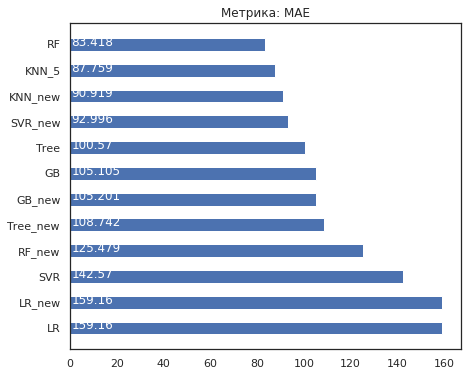

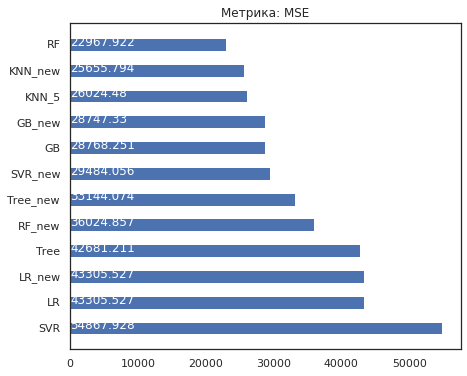

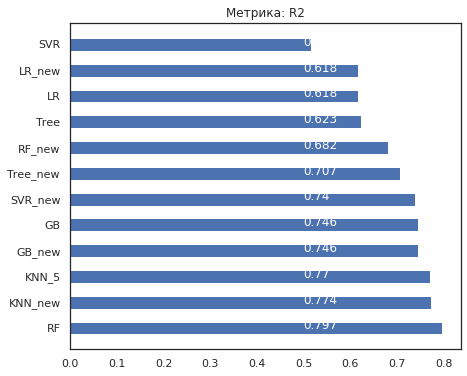

In [411]:
# Построим графики метрик качества модели
for metric in regr_metrics:
    regrMetricLogger.plot('Метрика: ' + metric, metric, ascending=False, figsize=(7, 6))

### Вывод: на основании всех трех метрик, лучшей оказалась модель "Случайный лес".